Read the doc:
[pytorch](http://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html)

## Tensors

In [52]:
import torch

x = torch.tensor(
    [
      [2.0, 3.0],
      [4.0, 5.0],
      [6.0, 7.0]
    ]
)
print(x.shape)
print(x)

torch.Size([3, 2])
tensor([[2., 3.],
        [4., 5.],
        [6., 7.]])


In [51]:
print(x.mean())
print(x.sum())
print(x / 2)

tensor(4.5000)
tensor(27.)
tensor([[1.0000, 1.5000],
        [2.0000, 2.5000],
        [3.0000, 3.5000]])


## are Numpy arrays

In [15]:
x_ = a.numpy()
x_[0, 0] = 0.

print(x)

tensor([[2., 3.],
        [4., 5.],
        [6., 7.]])


## with automatic differentiation !¶

In [16]:
x.requires_grad=True
print(x.grad_fn)

y = x + 2
print(y.grad_fn)

z = y * y * 3
print(z.grad_fn)

None


## Backpropagation

In [17]:
print(x.grad)

error = (10 - y).mean()
error.backward()

print(x.grad)

None
tensor([[-0.1667, -0.1667],
        [-0.1667, -0.1667],
        [-0.1667, -0.1667]])


# Gradient descent ?

In [74]:
x = torch.tensor([-0.5])  # input
y = torch.tensor([1.0])  # target

# parameters
w = torch.tensor([0.0], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)

alpha = 0.1
for i in range(10):

  # forward pass (linear perceptron)
  h = w * x + b
  error = (y - h)**2

  # backward pass (compute and store gradients)
  error.backward()

  # gradient descent step
  w.data.sub_(alpha * w.grad)
  b.data.sub_(alpha * b.grad)

  # reset gradients for next pass
  w.grad.zero_()
  b.grad.zero_()

  print(f"Epoch {i+1:02d} w={w[0]:.05f} b={b[0]:.05f} h={h[0]:.05f} error={error[0]:.05f}")

Epoch 01 w=-0.10000 b=0.20000 h=0.00000 error=1.00000
Epoch 02 w=-0.17500 b=0.35000 h=0.25000 error=0.56250
Epoch 03 w=-0.23125 b=0.46250 h=0.43750 error=0.31641
Epoch 04 w=-0.27344 b=0.54688 h=0.57813 error=0.17798
Epoch 05 w=-0.30508 b=0.61016 h=0.68359 error=0.10011
Epoch 06 w=-0.32881 b=0.65762 h=0.76270 error=0.05631
Epoch 07 w=-0.34661 b=0.69321 h=0.82202 error=0.03168
Epoch 08 w=-0.35995 b=0.71991 h=0.86652 error=0.01782
Epoch 09 w=-0.36997 b=0.73993 h=0.89989 error=0.01002
Epoch 10 w=-0.37747 b=0.75495 h=0.92492 error=0.00564


Try different values for `alpha`: 0.01, 0.1, 1... What do you see ?

# Your turn !

Let's build a synthetic problem

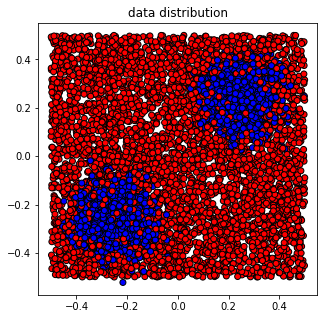

In [157]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(1337)

X_ = np.concatenate((
    np.random.random(
        size=(5000, 2)) - 0.5,
    np.random.multivariate_normal(
        size=(2500, ),
        mean=(-.25, -.25),
        cov=((0.005, 0), (0, 0.005))),
    np.random.multivariate_normal(
        size=(2500, ),
        mean=(0.25, 0.25),
        cov=((0.005, 0), (0, 0.005))),
))

Y_ = np.concatenate((
    np.zeros(shape=(5000, 1)),
    np.ones(shape=(5000, 1)),
))

X_ = np.asarray(X_, dtype='float32')
Y_ = np.asarray(Y_, dtype='float32')

# shuffle data points
perm = np.random.permutation(X_.shape[0])
X_ = X_[perm]
Y_ = Y_[perm]

# numpy arrays -> torch tensors
torch.manual_seed(1337)

X = torch.from_numpy(X_)
Y = torch.from_numpy(Y_)

cm = plt.cm.RdBu
cm_bright = matplotlib.colors.ListedColormap(['#FF0000', '#0000FF'])

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), squeeze=False)
axes[0, 0].set_title('data distribution')
axes[0, 0].scatter(
    X[:, 0].numpy(),
    X[:, 1].numpy(),
    c=Y[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

We create two separate datasets: train and test

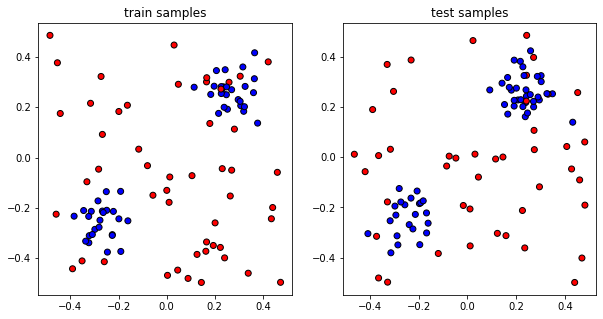

In [167]:
# train / test split
n_train = 100
n_test = 100

X_train = X[:n_train]
Y_train = Y[:n_train]

X_test = X[n_train:(n_train + n_test)]
Y_test = Y[n_train:(n_train + n_test)]

cm = plt.cm.RdBu
cm_bright = matplotlib.colors.ListedColormap(['#FF0000', '#0000FF'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), squeeze=False)
axes[0, 0].set_title('train samples')
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test samples')
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

## Can you tell blue and red from the coordinates ?

Implement a perceptron (neural network with no hidden layer) that takes as input $\mathbf{x} \in \mathbb{R}^2$ and produces a single output $\mathbf{y} \in [0, 1]$ (sigmoid activation).

Hint: for matrix multiplication use [torch.matmul](https://pytorch.org/docs/stable/generated/torch.matmul.html). Do not forget [torch.sigmoid](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) at the end.

Do not use high-level PyTorch utilities ! (`torch.optim`, `torch.nn` etc.).

In [ ]:
import numpy as np

torch.manual_seed(0)

n_in = 2
n_out = 1

W1 = torch.normal(torch.zeros(n_in, n_out), np.sqrt(2/(n_in + n_out))).requires_grad_(True)
b1 = torch.zeros(n_out).requires_grad_(True)

params = [W1, b1]


def forward(X):

    H = ...
    # TODO: your code goes here !

    return H


def L(H, Y, eps=1e-08):
    loss = -Y * torch.log(H + eps) - (1 - Y) * torch.log(1 - H + eps)  # negative log-likelikood

    return loss


n_epochs = 100
epoch_n_batches = 200
batch_size = 10
alpha = 0.01

for i in range(n_epochs):

    # training

    train_loss = 0.
    for j in range(epoch_n_batches):

        # Prepare the next mini-batch
        mb_idxs = torch.multinomial(torch.ones(n_train), batch_size, replacement=True)
        X_mb = X_train[mb_idxs]
        Y_mb = Y_train[mb_idxs]

        # Forward pass
        Y_prob_mb = forward(X_mb)

        # Loss function
        loss = L(Y_mb, Y_prob_mb).mean()

        # Backward pass
        loss.backward()

        # gradient descent step
        for param in params:
          param.data.sub_(alpha * param.grad)

        # reset gradients for next pass
        for param in params:
          param.grad.zero_()

        train_loss += loss.item()

    train_loss /= epoch_n_batches

    # testing

    # Forward pass
    Y_test_prob = forward(X_test)
    test_loss = L(Y_test_prob, Y_test).mean().item()

    # Compute expected 0/1 error
    Y_test_pred = (Y_test_prob > 0.5).type(torch.float)
    test_err = torch.abs(Y_test - Y_test_pred).mean().item()

    print(f"Epoch {i+1:03d} train loss={train_loss:.06f} test loss={test_loss:.06f} 0/1 error={test_err:.03f}")

You can visualize what your model has learned

In [ ]:
map_size = (100, 100)
x1, x2 = np.meshgrid(np.linspace(X_[:, 0].min()-0.1, X_[:, 0].max()+0.1, map_size[0]),
                     np.linspace(X_[:, 1].min()-0.1, X_[:, 1].max()+0.1, map_size[1]))
X_map = torch.from_numpy(np.asarray(np.c_[x1.ravel(), x2.ravel()], dtype='float32'))

Y_prob_map = forward(X_map).data

Y_train_pred = (forward(X_train).data > 0.5).type(torch.FloatTensor)
train_err = torch.abs(Y_train - Y_train_pred).mean()

Y_test_pred = (forward(X_test).data > 0.5).type(torch.FloatTensor)
test_err = torch.abs(Y_test - Y_test_pred).mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train accuracy={:.03f}'.format(1 - train_err))
axes[0, 0].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test accuracy={:.03f}'.format(1 - test_err))
axes[0, 1].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

## What is going wrong ?

Add a hidden layer of size 10 to your model, with the RELU activation function ([torch.clamp](https://pytorch.org/docs/stable/generated/torch.clamp.html)).

Bonus:
 - try more layers
 - try different activation functions
 - try increasing the training dataset size